# WRAGLING AND ANALYZE DATA

## Step 1: Gathering Data

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
tweets = []
with open('tweet-json.txt', 'r',encoding='utf-8') as js:
    for line in js:
        tweets.append(json.loads(line))
tweets = pd.DataFrame(tweets)

In [5]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# print('Start crawl')
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)
 
# tweet_ids = enhanced.tweet_id.values
# total = len(tweet_ids)

# count = 0
# fails_dict = {}
# start = timer()

# with open('tweet_json.txt', 'w') as outfile:
#     per = 0
#     for tweet_id in tweet_ids:
#         if count == int(per*total):
#             print(int(per*100), '%')
#             per += 0.01
#         count += 1
# #         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except Exception as e:
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)

## Step 2: Assessing Data

1. image_prediction.tsv

In [6]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


2. tweet-json.json

In [9]:
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [11]:
tweets.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


3. twitter-archive-enhanced.csv

In [12]:
enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### **♦ Quality issues**


Q1. Data type of:

id, id_str, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, tweet_id, retweeted_status_id, retweeted_status_user_id should be object

retweeted_status_timestamp, timestamp should be datetime

Q2: Dog names not corrected

Q3: Dog breeds can be standardized

Q4: Find and update incorrect ratings

Q5: Change the name of "id" column to "tweet_id"

Q6: Some columns may be renamed to improve clarity

Q7: "None" values must be converted to NULL objects

Q8: Retweets need to be removed

#### **♦ Tidiness issues**

T1: Split created_at column into: create_at_day, create_at_time

T2: Combine 4 columnns (doggo, floofer, pupper, puppo) into one

T3: Create new column about rating

T4: Join 3 datasets

## Step 3: Cleaning Data

**-- Make a copy**

In [15]:
prediction_copy = prediction.copy()
tweets_copy = tweets.copy()
enhanced_copy = enhanced.copy()

**-- Define**

D1: Change data type of tweet_id, id, id_str, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str,... to object


**-- Code**

In [16]:
prediction_copy['tweet_id'] = prediction_copy['tweet_id'].astype('str')

enhanced_copy['tweet_id'] = enhanced_copy['tweet_id'].astype('str')
enhanced_copy['in_reply_to_status_id'] = enhanced_copy['in_reply_to_status_id'].astype('object')
enhanced_copy['in_reply_to_user_id'] = enhanced_copy['in_reply_to_user_id'].astype('object')

tweets_copy['id'] = tweets_copy['id'].astype('str')
tweets_copy['id_str'] = tweets_copy['id_str'].astype('object')
tweets_copy['in_reply_to_status_id'] = tweets_copy['in_reply_to_status_id'].astype('object')
tweets_copy['in_reply_to_status_id_str'] = tweets_copy['in_reply_to_status_id_str'].astype('object')
tweets_copy['in_reply_to_user_id'] = tweets_copy['in_reply_to_user_id'].astype('object')
tweets_copy['in_reply_to_user_id_str'] = tweets_copy['in_reply_to_user_id_str'].astype('object')

**-- Test**

In [17]:
prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [18]:
tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   object 
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     object 
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     object 
 12  in_reply_to_user_id_str        78 non-null     o

In [19]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     object 
 2   in_reply_to_user_id         78 non-null     object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**-- Define**

Q2: Dog names not corrected

**-- Code**

In [20]:
mask = enhanced_copy.name.str.contains('^[a-z]', regex = True)

**-- Test**

In [21]:
enhanced_copy[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

**-- Define**

Q3: Dog breeds can be standardized

**-- Code**

In [22]:
prediction_copy['p1'] = prediction_copy['p1'].str.lower()
prediction_copy['p2'] = prediction_copy['p2'].str.lower()
prediction_copy['p3'] = prediction_copy['p3'].str.lower()

**-- Test**

In [23]:
prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**-- Define**

Q4: Find and update incorrect ratings

**-- Code**

In [24]:
right_ratings = {
"835246439529840": {'num': 13, 'den': 10},
"832088576586297": {'num': '', 'den': ''},
"810984652412424": {'num': '', 'den': ''},
"775096608509886": {'num': 14, 'den': 10},
"740373189193256": {'num': 14, 'den': 10},
"722974582966214": {'num': 13, 'den': 10},
"716439118184652": {'num': 11, 'den': 10},
"682962037429899": {'num': 10, 'den': 10},
"666287406224695": {'num': 9, 'den': 10}
}

numerator = []
denominator = []
for index, record in enhanced_copy.iterrows():
    idd = record["tweet_id"][:-3]
    try:
        num = right_ratings[idd][0]
        den = right_ratings[idd][1]
#         print(num, den)
    except:
        pass
    if idd in right_ratings.keys():
#         print(idd)
        numerator.append(num if len(right_ratings[idd]) == 0 else '') 
        denominator.append(den if len(right_ratings[idd]) == 0 else '')
    else:
#         print(id)
        numerator.append(record["rating_numerator"])
        denominator.append(record["rating_denominator"])
enhanced_copy["rating_numerator"] = numerator
enhanced_copy["rating_denominator"] = denominator

**-- Test**

In [25]:
temp = enhanced_copy[(enhanced_copy['rating_numerator'] == 960)]
temp

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**-- Define**

Q5: Ratings with decimal values incorrectly extracted

**-- Code**

In [26]:
ratings = enhanced_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

enhanced_copy.rating_numerator = ratings[0]
enhanced_copy.rating_denominator = ratings[1]

**-- Test**

In [27]:
temp = enhanced_copy[(enhanced_copy['tweet_id'] == "786709082849828864")]
temp

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None


**-- Define**

Q6: Change the name of "id" column to "tweet_id"

**-- Code**

In [28]:
tweets_copy = tweets_copy.rename({'id': 'tweet_id'}, axis=1)

**-- Test**

In [29]:
tweets_copy.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


**-- Define**

Q7: Some columns may be renamed to improve clarity 


**-- Code**

In [30]:
prediction_copy = prediction_copy.rename({'p1': '1st_prediction'}, axis=1)
prediction_copy = prediction_copy.rename({'p1_conf': '1st_confidence'}, axis=1)
prediction_copy = prediction_copy.rename({'p2': '2nd_prediction'}, axis=1)
prediction_copy = prediction_copy.rename({'p2_conf': '2nd_confidence'}, axis=1)
prediction_copy = prediction_copy.rename({'p3': '3rd_prediction'}, axis=1)
prediction_copy = prediction_copy.rename({'p3_conf': '3rd_confidence'}, axis=1)

**-- Test**

In [31]:
prediction_copy.head()

,tweet_id,jpg_url,img_num,1st_prediction,1st_confidence,p1_dog,2nd_prediction,2nd_confidence,p2_dog,3rd_prediction,3rd_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**-- Define:**

Q8: Remove rows that have non-empty in retweeted_status_id

**-- Code:**

In [32]:
enhanced_copy = enhanced_copy[(enhanced_copy['retweeted_status_id'].isnull())]


**-- Test:**

In [33]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     object 
 2   in_reply_to_user_id         78 non-null     object 
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   object 
 11  rating_denominator          2175 non-null   object 
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**-- Define:**

Q9: Remove some unnecessary columns

**-- Code:**

In [34]:
tweets_column = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_screen_name', 'user', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'quoted_status_id', 'display_text_start', 'display_text_end']

for col in tweets_copy.columns:
    if col not in tweets_column:
        tweets_copy.drop(col, axis = 1, inplace = True)

In [35]:
enhanced_column = ['source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

for col in enhanced_copy.columns:
    if col in enhanced_column:
        enhanced_copy.drop(col, axis = 1, inplace = True)

**-- Test:**

In [36]:
enhanced_copy.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [37]:
tweets_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id
0,892420643555336193,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,False,en,NaN,NaN
1,892177421306343426,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,False,en,NaN,NaN
2,891815181378084864,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,False,en,NaN,NaN
3,891689557279858688,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,False,en,NaN,NaN
4,891327558926688256,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,False,en,NaN,NaN


**-- Define:**

T1: Combine 4 columnns into one


**-- Code:**

In [38]:
enhanced_copy.doggo = enhanced_copy.doggo.replace('None','')
enhanced_copy.floofer = enhanced_copy.floofer.replace('None','')
enhanced_copy.pupper = enhanced_copy.pupper.replace('None','')
enhanced_copy.puppo = enhanced_copy.puppo.replace('None','')

enhanced_copy['stage'] = enhanced_copy['doggo'] + enhanced_copy['floofer'] + enhanced_copy['pupper'] + enhanced_copy['puppo']


In [39]:
enhanced_copy.stage = enhanced_copy.stage.replace('doggofloofer','doggo')
enhanced_copy.stage = enhanced_copy.stage.replace('doggopuppo','doggo')
enhanced_copy.stage = enhanced_copy.stage.replace('doggopupper','doggo')

In [40]:
enhanced_column = ['doggo', 'pupper', 'floofer', 'puppo']

for col in enhanced_copy.columns:
    if col in enhanced_column:
        enhanced_copy.drop(col, axis = 1, inplace = True)

**-- Test:**

In [41]:
enhanced_copy.stage.value_counts()

           1831
pupper      224
doggo        87
puppo        24
floofer       9
Name: stage, dtype: int64

**-- Define:**

T2: Split created_at column into: create_at_day, create_at_time


**-- Code:**

In [42]:
day = []
time = []
for i, record in enhanced_copy.iterrows():
    day.append(record['timestamp'].split()[0])
    time.append(record['timestamp'].split()[1].split('+')[0])

enhanced_copy['created_at_day'] = day
enhanced_copy['created_at_time'] = time

**-- Test:**

In [43]:
enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,created_at_day,created_at_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,2017-07-29,16:00:24


**-- Define:**

T3: Create new column about rating

**-- Code:**

In [44]:
rs = []
for index, record in enhanced_copy.iterrows():
    try:
        num = float(record['rating_numerator'])
        den = float(record['rating_denominator'])
        rs.append(float(round(num/den,2)))
    except:
        rs.append('')
enhanced_copy['rating_result'] = rs

**-- Test:**

In [45]:
enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,created_at_day,created_at_time,rating_result
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,2017-08-01,16:23:56,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,2017-08-01,00:17:27,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,2017-07-31,00:18:03,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,2017-07-30,15:58:51,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,2017-07-29,16:00:24,1.2


**-- Define:**

T4: Join 3 datasets

**-- Code:**

In [46]:
df_master = pd.merge(enhanced_copy, tweets_copy, how = 'left', on = 'tweet_id')

In [47]:
enhanced_id = enhanced_copy['tweet_id'].to_list()
tweet_id = tweets_copy['tweet_id'].to_list()
prediction_id = prediction_copy['tweet_id'].to_list()

# print(type(enhanced_id[0]))
# print(type(enhanced_id[0]), type(tweet_id[0]), type(prediction_id[0]))
# for id in enhanced_id:
#     if id not in tweet_id:
#         print(id)

In [48]:
df_master = pd.merge(df_master, prediction_copy, how = 'left', on = 'tweet_id')

**-- Test:**

In [49]:
df_master.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,...,img_num,1st_prediction,1st_confidence,p1_dog,2nd_prediction,2nd_confidence,p2_dog,3rd_prediction,3rd_confidence,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


# Step 4: Storing data

In [50]:
df_master.to_csv("twitter_archive_master.csv", encoding="utf-8", index=False) 

# Step 5: Analyzing and Visualizing Data

In [52]:
def show(plt, x, y , t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

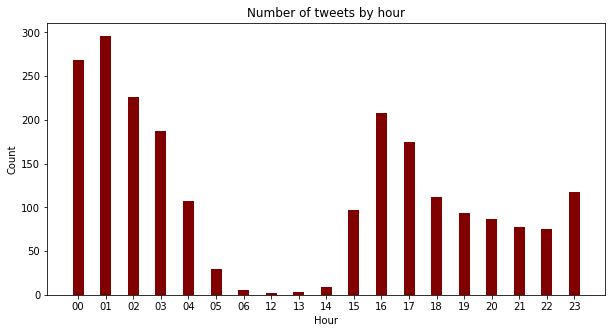

In [53]:
df_copy = df_master.copy()
df_copy['hour'] = df_copy.apply(lambda row: row.created_at_time[:2], axis = 1)

count_hour = sorted(df_copy['hour'].value_counts().to_dict().items())

hour = [ele[0] for ele in count_hour]
values = [ele[1] for ele in count_hour]

fig = plt.figure(figsize = (10, 5))
 
plt.bar(hour, values, color ='maroon',
        width = 0.4)
 
show(plt, "Hour", "Count", "Number of tweets by hour")

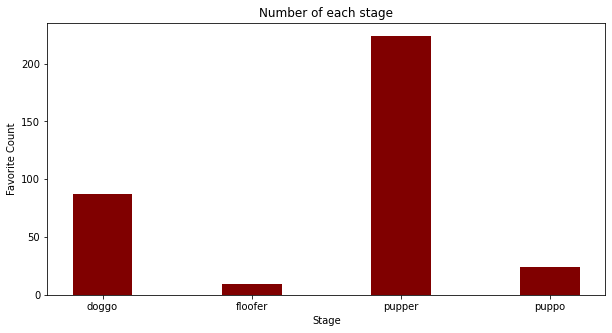

In [61]:
df_temp = df_copy[(df_copy['stage'] != '')][['stage', 'favorite_count']]

count_stage = sorted(df_temp['stage'].value_counts().to_dict().items())

stage = [ele[0] for ele in count_stage]
values = [ele[1] for ele in count_stage]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(stage, values, color ='maroon',
        width = 0.4)
 
show(plt, "Stage", "Favorite Count", "Number of each stage")

[('doggo', 17108.80459770115), ('floofer', 11064.444444444445), ('pupper', 7176.267857142857), ('puppo', 20788.875)]


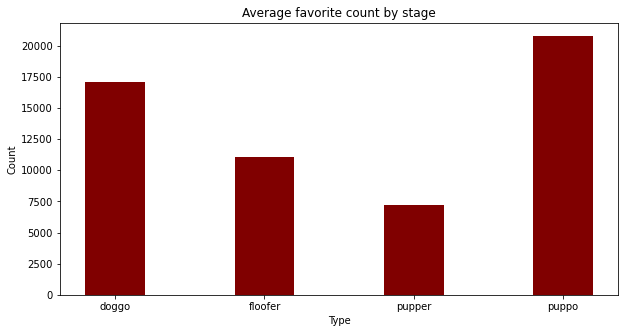

In [60]:
df_temp1 = df_temp.groupby(['stage']).mean()
df_temp1['stage'] = df_temp1.index

result = {}
for index, record in df_temp1.iterrows():
    stage = record['stage']
    favorite = record['favorite_count']
    result[stage] = favorite


items = result.items()
count_favorite = sorted(items)
# print(count_favorite)

stage = []
favourite = []
for ele in count_favorite:
    stage.append(ele[0])
    favourite.append(ele[1])
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(stage, favourite, color ='maroon',
        width = 0.4)
 
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Average favorite count by stage")
plt.show()

Text(16.64875868055556, 0.5, 'Number of Retweet')

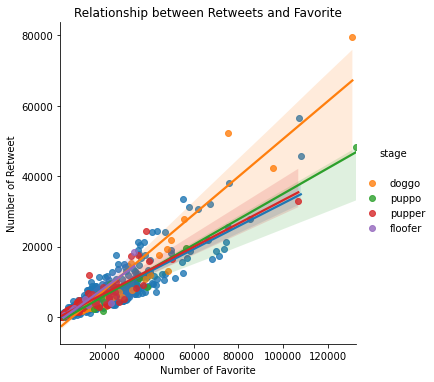

In [63]:
sns.lmplot(x="favorite_count", 
           y="retweet_count",
           hue="stage",
           data=df_master)
plt.title('Relationship between Retweets and Favorite')
plt.xlabel('Number of Favorite')
plt.ylabel('Number of Retweet')